# Lab: Support Vector Machine
Train a SVM for an AI task

**Requirements**

`Requirement 1`: Choose a SVM with any Kernel of your choice. While not obligatory, opting for either from-scratch implementation or using advanced techniques from a research paper will receive higher evaluation.

`Requirement 2`: Choose a Machine Learning Task of your choice: Regression, Classification

`Requirement 3`: Choose any dataset of your choice

`Requirement 4`: Apply EDA and Pre-processing. Your extracted features, plots, or insights need to be directly related to why it helps your SVM Algorithm peform better

`Requirement 5`: Train and Predict with your SVM

`Requirement 6`: Evaluate your SVM metrics

`Requirement 7`: Compare your SVM with another algorithm or from a different kernel and explain why one is better or worse.

**Scoring Criteria**
You will be graded based on Originality of your implementation: Did you implement anything new in the model or just re-use it? How much work did you put into implementing your model? Result of your implementation: Accuracy, Loss, Cross-validation. Q/A to test your understanding: How well do you understand your code? How well do you understand Machine Learning concepts? Note: DO NOT add comments in your code

In [35]:
import pandas as pd
from sklearn import svm
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

## Load Data

#### Examples

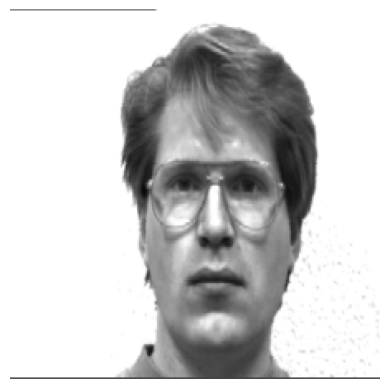

In [34]:
b = plt.imread("./yale_face_database/subject01.glasses")
b = cv2.cvtColor(b, cv2.COLOR_GRAY2RGB)
b = cv2.resize(b, (224, 224), interpolation=cv2.INTER_AREA)
plt.imshow(b)
plt.axis("off")
plt.show()

#### Full Dataset

In [8]:
X = []
y = []

for dirname, _, filenames in os.walk("./yale_face_database/data"):
    for filename in filenames:
        if filename != "Readme.txt":
            img = plt.imread(os.path.join(dirname, filename))
            
            try:
                img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
            except:
                pass
        
            img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA)

            if b.shape == (224, 224, 3):
                y.append(int(filename[7:9]))
                X.append(img)
            else:
                print(img.shape)


In [13]:
data = []

for i in range(1, 16):
    person = []
    for u in range(len(y)):
        if y[u] == i:
            person.append(X[u])
    data.append([person, i*len(person)])
    print(str(len(person))+" images  for class "+ str(i))

11 images  for class 1
11 images  for class 2
11 images  for class 3
11 images  for class 4
11 images  for class 5
11 images  for class 6
11 images  for class 7
11 images  for class 8
11 images  for class 9
11 images  for class 10
11 images  for class 11
11 images  for class 12
11 images  for class 13
11 images  for class 14
11 images  for class 15


## Preprocess Data

### dadsa

In [44]:
import random
random.seed(42)

newX1 = []
newX2 = []
newY = []

for i in range(len(data)):
    parts = int(len(data[i][0]) / 2)
    
    for u in range(parts):
        newX1.append(data[i][0][u])
        newX2.append(data[i][0][u+parts])
        newY.append(0)

    for uu in range(parts):
        numbers = list(range(0, i))+list(range(i+1, 11))
        r = random.choice(numbers)
        g = random.randint(0, len(data[r][0])-1)

        newX1.append(data[i][0][uu])
        newX2.append(data[r][0][g])
        newY.append(1)

print("Target values count: "+ str(np.unique(newY, return_counts=True)))


Target values count: (array([0, 1]), array([75, 75]))


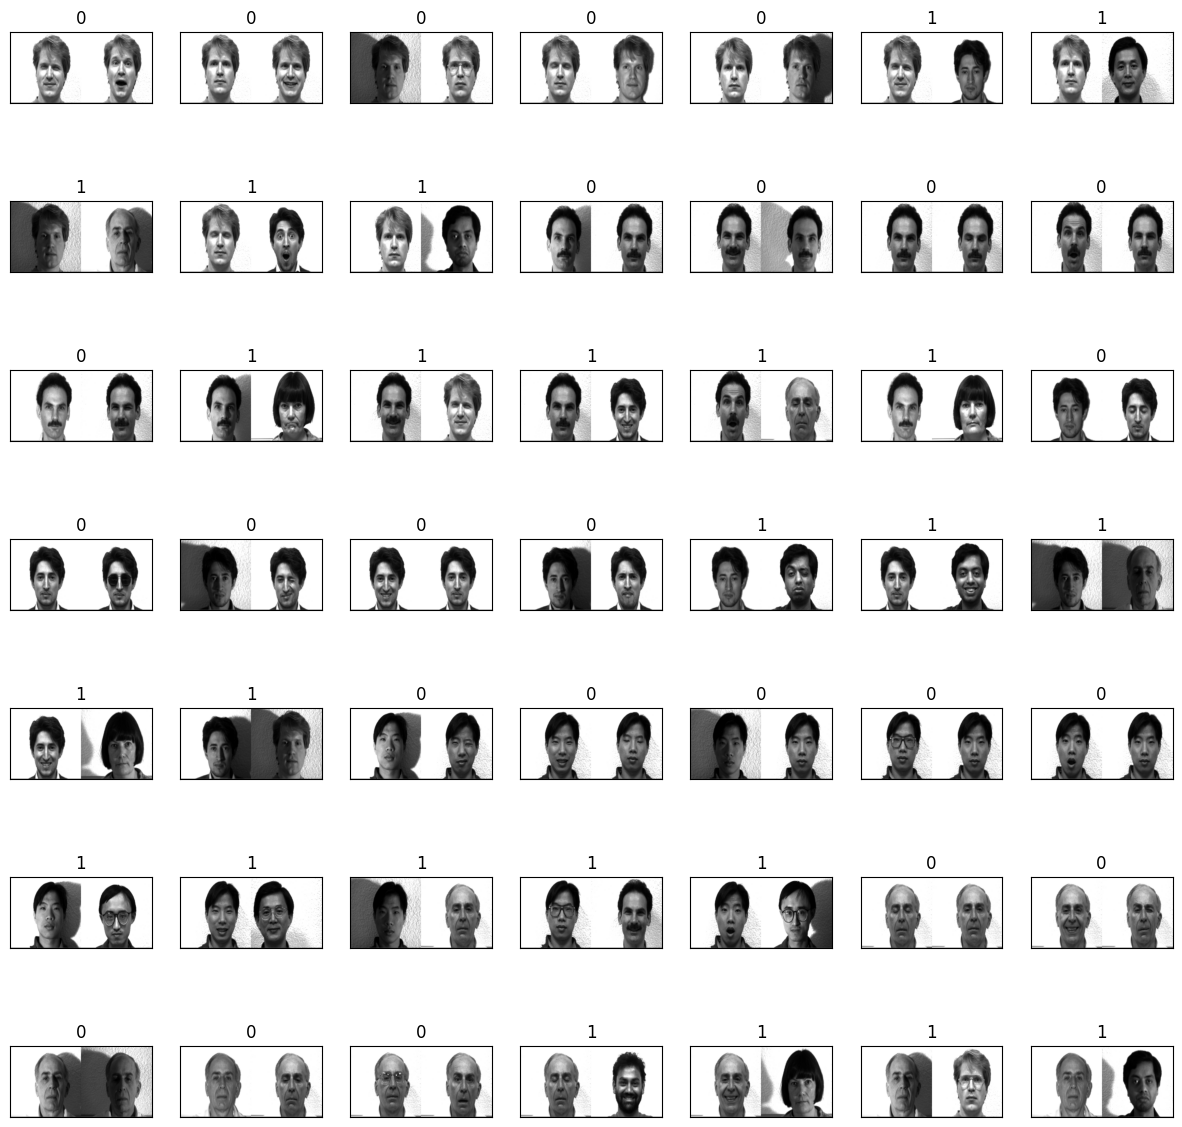

In [45]:
fig = plt.figure(figsize=(15,15))
columns = 7
rows = 7
for i in range(1, columns*rows+1):
    ax = fig.add_subplot(rows, columns, i)
    plt.imshow(np.concatenate((newX1[i-1], newX2[i-1]), axis=1))
    ax.title.set_text(newY[i-1])
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

In [46]:
c = list(zip(newX1, newX2, newY))

random.shuffle(c)

a,b,y = zip(*c)

### Apply PCA for dimention reduction

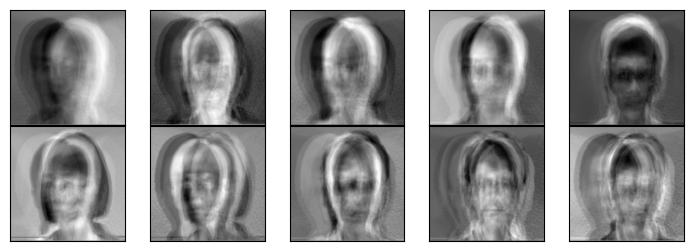

In [47]:
from sklearn.decomposition import PCA

Xpca = np.array(a)
Xpca = Xpca.reshape(Xpca.shape[0], Xpca.shape[1]*Xpca.shape[2]*Xpca.shape[3])

faces_pca = PCA(n_components=0.9)
faces_pca.fit(Xpca)

fig, axes = plt.subplots(
    2,
    5,
    figsize=(9,3),
    subplot_kw={'xticks':[], 'yticks':[]},
    gridspec_kw=dict(hspace=0.01, wspace=0.01)
)
for i, ax in enumerate(axes.flat):
    ax.imshow(np.interp(faces_pca.components_[i], (min(faces_pca.components_[i]),max(faces_pca.components_[i])), (0, 255)).reshape(224,224,3).astype("int"))

In [52]:
indexes1=[i for i,x in enumerate(y) if x == 1]
indexes0=[i for i,x in enumerate(y) if x == 0]

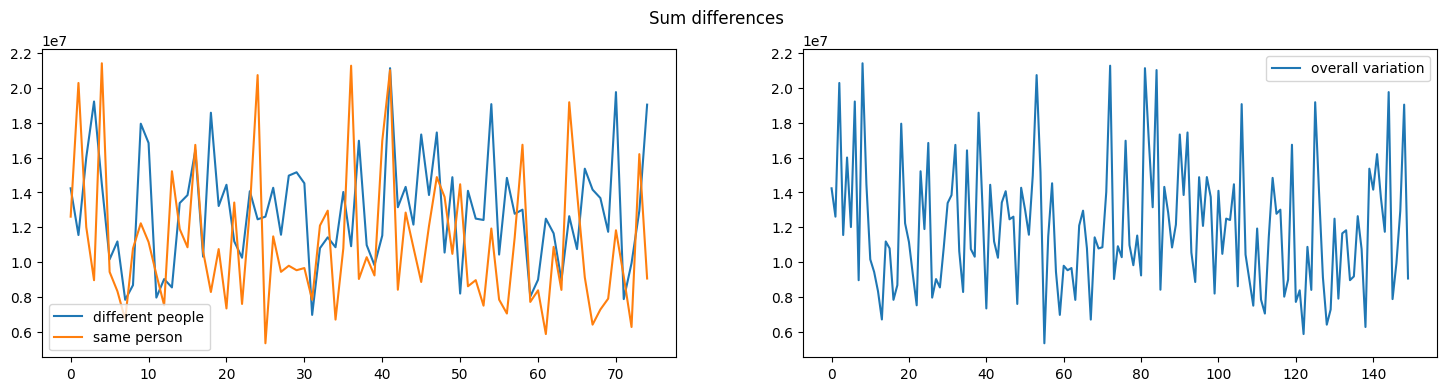

In [53]:
arr=[]
su=[]
output1=a
output2=b
for s in range(len(output1)):
    oo = np.abs(np.subtract(np.array(output1[s]),np.array(output2[s])))
    arr.append(oo)
    su.append(oo.sum())
    
a = np.array(su)
su1=list(a[indexes1])
su0=list(a[indexes0])

fig, axs = plt.subplots(1, 2)
fig.set_size_inches(18, 4)
fig.suptitle("Sum differences")
axs[0].plot(list(range(75)),su1, list(range(75)),su0)
axs[0].legend(["different people", "same person"])
#axs[0].title("Euclidean distance")
axs[1].plot(list(range(150)),su)
axs[1].legend(["overall variation"])

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, f1_score, make_scorer
from sklearn.svm import SVC
from sklearn.preprocessing import Normalizer

scorer = make_scorer(f1_score, average='macro')
X_train, X_test,y_train,y_test= train_test_split(arr,y,test_size=0.2, random_state=42)
print(np.array(X_train).shape)
tuned_parameters = [{
    'kernel': ['rbf','poly','linear'], 
    'gamma': [1e-3, 1e-4, 1e-5],
    'C': [1, 10, 100, 1000]
}]
scores = ['precision', 'recall']
#for score in scores:

clf = GridSearchCV(SVC(), tuned_parameters, scoring=scorer)
clf.fit(Normalizer().fit(X_train).transform(X_train), y_train)
params=clf.best_params_
print(clf.best_params_)
cv= SVC(C=params["C"], gamma= params["gamma"], kernel=params["kernel"])
cv.fit(Normalizer().fit(X_train).transform(X_train), y_train)

y_pred = cv.predict(Normalizer().fit(X_test).transform(X_test))
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()

(120, 224, 224, 3)


ValueError: Found array with dim 4. Normalizer expected <= 2.